### import required packages

In [1]:
# satatistical calculation
import numpy as np

# loading data
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### load the data

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

### EDA

In [3]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# find any columns has missing value
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
# find relationship 
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<AxesSubplot:>

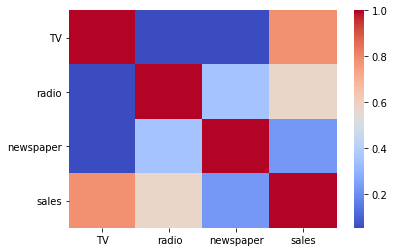

In [8]:
sns.heatmap(corr,cmap='coolwarm')

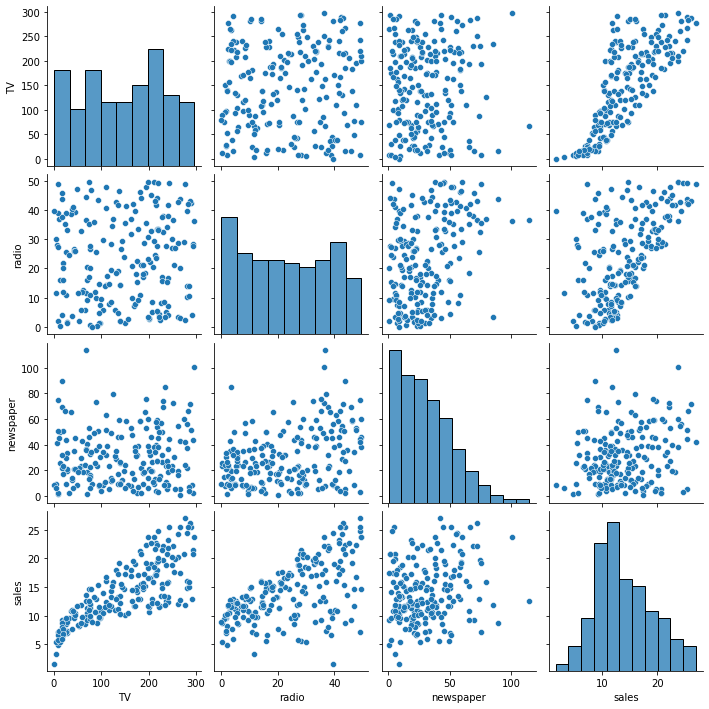

In [9]:
sns.pairplot(df)

In [11]:
#decide x and y
x =df.drop('sales',axis =1)
y =df['sales']

### prepare data for ML algorithm

#split data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)
# print(x_train)

### train the model

In [12]:
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# train the model using train data set
model.fit(x_train, y_train)

LinearRegression()

### predict all the test records

In [13]:
# predict the salaries for all the employees in the test data set
# y_predictions = y hat
y_predictions = model.predict(x_test)
print(x_test)
print(y_test)
print(y_predictions)


        TV  radio  newspaper
28   248.8   27.1       22.9
77   120.5   28.5       14.2
190   39.5   41.1        5.8
195   38.2    3.7       13.8
131  265.2    2.9       43.0
..     ...    ...        ...
23   228.3   16.9       26.2
1     44.5   39.3       45.1
124  229.5   32.3       74.2
145  140.3    1.9        9.0
61   261.3   42.7       54.7

[160 rows x 3 columns]
28     18.9
77     14.2
190    10.8
195     7.6
131    12.7
       ... 
23     15.5
1      10.4
124    19.7
145    10.3
61     24.2
Name: sales, Length: 160, dtype: float64
[19.86536852 13.57682941 11.6862851   4.9825576  16.39437058 13.066123
 13.02391115 14.12410594 10.83140798  9.95057789  9.6521113  10.24046439
 11.05953016  7.78585788 20.87444844 15.27594857  3.96717851 11.35214449
 15.18666828 10.10087326 24.62168579 14.0799569  20.67594565 12.05711425
 15.92337946 15.74580205 15.38302471 25.14746251 21.59693833 15.70163917
 16.63985112  6.1970501  16.72391758  9.77057644 13.08428344 15.45054464
 17.57780552 23.764

### evaluate the model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_predictions)
print(f"MAE = {MAE}")

MAE = 1.3058252009236546


In [15]:
MSE = mean_squared_error(y_test, y_predictions)
print(f"MSE = {MSE}")

MSE = 2.792988383753862


In [16]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 1.6712236187158982


In [17]:
R2 = r2_score(y_test, y_predictions)
print(f"R2 = {R2}")

R2 = 0.8959824914536414
